In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
df1=pd.read_csv("../data/NSSCrisisv.1.csv")
df1.head()

C:\Users\pcunn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,26,27,28,29,31,35,36,37,38,39,40,41,42,43,44,45,48,51,54,55,56,57,58,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,88,89,92,93,94,95,96,97,102,103,104,105,106,107,108,113,117,120,121,122,124,128,136,140,141,142,143,144,145,146,148,152,153,154,155,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,259,261,262,263,264,265,266,267,268,269,270,271,272,273,281,282,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(co

,FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:57 AM.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299,Unnamed: 300,Unnamed: 301,Unnamed: 302,Unnamed: 303,Unnamed: 304,Unnamed: 305,Unnamed: 306,Unnamed: 307,Unnamed: 308,Unnamed: 309,

In [3]:
header_row = df1.iloc[1]
df1 = pd.DataFrame(df1.values[2:], columns=header_row)
df1.head()

1,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneWorkerName,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,WasSilentCall,GeoCode,GeoAssignment,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,211Region,PhoneExtension,PhoneType,ThirdPartyName,ThirdPartyOrganization,ThirdPartyPhoneNumber,ThirdPartyAddress,ThirdPartyCity,ThirdPartyCounty,ThirdPartyStateProvince,ThirdPartyPostalCode,Narrative,VolunteerComments,Feedback,CallersFeedback,TextField2,TextField3,TextField4,TextField5,TextField6,TextField7,TextField8,TextField9,TextField10,EnteredByWorkerNum,EnteredByName,EnteredOn,Supervisor,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,IPAddress,OrgNum,VolIdentifier,CRISIS Demographics - Date of Birth,CRISIS Demographics - Exact Age,CRISIS Demographics - Occupation,CRISIS Demographics - Suffix,CRISIS Diocese Case Management Plan - Other details about support needed,CRISIS Other person with information on case - Address,CRISIS Other person with information on case - Name,CRISIS Other person with information on case - Phone,CRISIS PQI (Admin Only) - Staff clarification about correction,CRISIS SOSL Call - Caller Email (Optional for interest in SOSL Group),CRISIS Success Story - Does this call have a success story? If so please describe:,CRISIS Unsuccessful Outcome - If checked please add reason for Unsuccessful Resolution:,HOM AX Demographics - Occupation,HOM AX Note Corrections - ADMIN ONLY - Staff question about correction required?,NSPL Phone Line - NSPL - Email,NSPL Phone Line - NSPL - If Veteran why didnt they press 1 for Veterans when calling Lifeline other reason?,PCAT CPS Report - Address of Child(ren) if different than primary,PCAT CPS Report - County of Residence,PCAT CPS Report - Date report made to CPS,PCAT CPS Report - Describe the situation,PCAT CPS Report - What has the caller observed?,SUI AX Assessment - If Backup consulted what was decided?,SUI Ax Contact overview - Third party name (if applicable),SUI AX Demographics - Name of Third Party,SUI AX Demographics - Occupation,SUI AX Note Corrections - ADMIN ONLY - Staff question about correction required?,SUI AX Reasons for living or dying - Reasons for dying,SUI AX Reasons for living or dying - Reasons for living,Transfer Information - Other Crisis Line/Agency name or number,CRISIS Additional Reporting - ADD APS Report,CRISIS Additional Reporting - ADD CPS Report,CRISIS Additional Reporting - ADD Diocese Case,CRISIS Assessment - Call Resolutions,CRISIS Assessment - Did you complete a Homicidal Risk Assessment for this call?,CRISIS Assessment - Did you complete a Suicide Assessment for this call?,CRISIS Assessment - Did you have to create safety plan for caller?,CRISIS Assessment - How many minutes did it take to document this call?,CRISIS Assessment - Resources Mobilized? (Police Mobile Crisis 911),CRISIS Assessment - Was the outcome of this call Successful or Unsuccessful?,CRISIS Assessment - What was the outcome of this call?,CRISIS Call Information - Additional calls within this call report,CRISIS Call Information - Call Type,CRISIS Call Information - Caller not reached,CRISIS Call Information - How did you hear about the Crisis Contact Center?,CRISIS Call Information - Phone Line,CRISIS Call Type - Outbound Crisis - Outbound caller was not reached,CRISIS Call Type - Outbound NSPL - Outbound caller was not reached,CRISIS Call Type - Outbound Pet Loss Line - Outbound caller was not reached,CRISIS CPS Report - Does the caller wish to remain anonymous?,CRISIS CPS Report - Follow-up letter requested?,CRISIS CPS Report - Gender,CRISIS CPS Report - Is there anyone else who can provide information on this case?,CRISIS Demographics - Age,CRISIS Demographics - Education Level,CRISIS Demographics - Ethnicity,CRISIS Demographics - Gender Identity,CRISIS Demographics - Goal 5 Progress,CRISIS Demographics - Has a disability?,CRISIS 

In [4]:
df2=pd.read_csv("../data/NSSCrisisv.2.csv")
df2.head(5)

C:\Users\pcunn\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,5,6,7,9,10,11,12,13,14,15,16,20,21,22,23,24,25,26,29,30,31,32,34,35,38,39,40,41,42,43,44,45,46,47,48,51,54,57,58,59,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,92,101,111,124,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,177,178,179,180,181,182,183,184,185,186,187,188,189,213,215,216,217,218,219,220,221,222,223,224,225,226,227,235,236,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,FamilyandChildrensService - CallReports export requested on Monday May 9 2022 at 9:58 AM.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259,Unnamed: 260
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
header_row = df2.iloc[1]
df2 = pd.DataFrame(df2.values[2:], columns=header_row)
df2.head()

1,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneWorkerName,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,WasSilentCall,GeoCode,GeoAssignment,CountyName,StateProvince,CountryName,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,211Region,PhoneExtension,PhoneType,ThirdPartyName,ThirdPartyOrganization,ThirdPartyPhoneNumber,ThirdPartyAddress,ThirdPartyCity,ThirdPartyCounty,ThirdPartyStateProvince,ThirdPartyPostalCode,Narrative,VolunteerComments,Feedback,CallersFeedback,TextField2,TextField3,TextField4,TextField5,TextField6,TextField7,TextField8,TextField9,TextField10,EnteredByWorkerNum,EnteredByName,EnteredOn,Supervisor,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,IPAddress,OrgNum,VolIdentifier,CRISIS Additional Reporting - If this contact is reportable for a success story to funders please describe briefly.,CRISIS Additional Reporting - Subjective information,CRISIS Call Information - Cold Transfer Description,CRISIS Call Information - Warm Transfer Description,CRISIS Diocese Case Management Plan - Details about support needed:,CRISIS Plan/Outcome - If no add reason for unsuccessful outcome:,CRISIS SOSL - Optional: email for group interest,Feedback - Feedback from Contact,Feedback - Feedback from Crisis Specialist,Feedback - Feedback from Supervisor or Note reviewer,HOM AX Demographics - Occupation,HOM AX Note Corrections - ADMIN ONLY - Staff question about correction required?,Homicide Imminent Risk - Other homicide category:,NSPL Phone Line - If Veteran why didnt they press 1 for Veterans other reason?,SUI AX Assessment - If Backup consulted what was decided?,SUI Ax Contact overview - Third party name (if applicable),SUI AX Demographics - Name of Third Party,SUI AX Demographics - Occupation,SUI AX Note Corrections - ADMIN ONLY - Staff question about correction required?,SUI AX Reasons for living or dying - Reasons for dying,SUI AX Reasons for living or dying - Reasons for living,CRISIS Additional Reporting - Add additional report:,CRISIS Additional Reporting - Additional calls within this contact,CRISIS Assessment - Anxiety,CRISIS Assessment - Eating,CRISIS Assessment - Interpersonal,CRISIS Assessment - Mood,CRISIS Assessment - Seeking Support,CRISIS Assessment - Sleep,CRISIS Assessment - Socio-Legal,CRISIS Assessment - Trauma Symptoms,CRISIS Call Information - Call Type,CRISIS Call Information - Caller not reached,CRISIS Call Information - From where?,CRISIS Call Information - How did you hear about the Contact Center?,CRISIS Call Information - Phone Line,CRISIS Call Information - Was this a transfer?,CRISIS Demographics - Age,CRISIS Demographics - Gender Identity,CRISIS Demographics - Military,CRISIS Demographics - Race/Ethnicity,CRISIS Diocese Case Management Plan - Area(s) of Support Needed:,CRISIS Imminent Risk - Was contact at imminent risk?,CRISIS Objective - Motor Activity/Speech,CRISIS Objective - Vocal Affect,CRISIS Plan/Outcome - Contact Disposition \t\t\t\t\t\t\t\t\t\t\t,CRISIS Plan/Outcome - Was the outcome successful?,CRISIS PQI (Admin Only) - Correction Needed?,CRISIS PQI (Admin Only) - Correction Type Needed,CRISIS PQI (Admin Only) - Correction(s) Checked by Admin?,CRISIS PQI (Admin Only) - Was silent monitoring conducted on this contact?,CRISIS SOSL - E-mailed SOSL distribution group?,CRISIS Subjective - Abusive Behavior,CRISIS Subjective - Emotional State,CRISIS Subjective - Financial/Basic Needs,CRISIS Subjective - Health/Physical,CRISIS Subjective - Homicide,CRISIS Subjective - Information or Services Needed,CRISIS Subjective - Mental Health,CRISIS Subjective - No presenting problems,CRISIS Subjective - Other Description,CRISIS Subjective - Relationships,CRISIS Subjective - Substances,CRISIS Subjective - Suicide,Debrief Request - Received debriefing with peer/supervisor?,Debrief Request - Request to review contact with a peer/supervisor,HOM AX Call Infor

In [6]:
crisis_call=pd.ExcelFile("../data/NSS_Crisis_call.xlsx")
volume2020 = pd.read_excel(crisis_call, "2020")
volume2021 = pd.read_excel(crisis_call, "2021")
volume2022 = pd.read_excel(crisis_call, "2022")
volume2020.head()

,Report Info,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Queue:,"AWARE,Community Response,Crisis Eng,Crisis Eng...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"Crisis Spanish,Crisis Spanish PRIORITY,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,"Lifeline,MHART,Pet Loss,REDLINE,Referral Line,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,SAMHSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Start Date:,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52876 entries, 0 to 52875
Columns: 312 entries, CallReportNum to Transfer Information - Which line/agency transferred you to this Crisis Line?
dtypes: object(312)
memory usage: 125.9+ MB


## Who works at the call center?

In [8]:
workers=df1.PhoneWorkerName.unique()
workers

array(['Lisa Crawford', 'Tandra Freeman', 'LaRhonda Williams',
       'Tasia Thompson', 'Brittany Joy-Hill', 'Andrea Word',
       'Brittany Townsend', 'Kimberly Ligon', 'Billy McGee', 'Joy  Reed',
       'Harriet Jackson', 'Stacey Bonner', 'Jennifer Triplett',
       'Kristen Small', 'Ilea Speight', 'Melanie  Rivers',
       'LaDonya Taylor', 'Darren Anderson', 'Joan VanReece',
       'Sherika Sims', 'Zach Sanders', 'Lauren Williams', 'Alex Ketel',
       'Tua Bultje', 'Shannon Huffman', 'Caleb McLean', 'Tanisha  Haynes',
       'Auslyn Thomas', 'Anessia  Smith', 'Winifred Cottrell',
       'Roger Zorn', 'Darvelyn Bermudez-Zorn', 'Senquita Cotton',
       'Lakeisha Read', 'Rachel Bailey', 'Nikki Scott', 'Keena Yarbrough',
       'Melinda Finch', 'Laurel White', 'Sandra Mooney', 'Holly Pyles',
       'Katherine  Delgado ', 'Ben Shuler', 'Monique Dildy',
       'Adrienne Wilson', 'David Spielman', 'Amanda Smith',
       'Maria Heerdt', 'Jalisa McBee', 'Christina Lawless',
       'Tieara

## How many calls did each worker take?

In [9]:
work_call_vol=df1.PhoneWorkerName.value_counts()
work_call_vol

Lisa Crawford             6118
Ilea Speight              5697
Brittany Joy-Hill         4806
LaRhonda Williams         4367
Kimberly Ligon            3727
Joan VanReece             3453
Joy  Reed                 3033
Sherika Sims              2258
Harriet Jackson           1885
Tanisha  Haynes           1687
Rachel Bailey             1669
Kristen Small             1586
Auslyn Thomas             1377
Lauren Williams           1067
Brittany Townsend         1001
Jennifer Triplett          891
Billy McGee                812
LaDonya Taylor             790
Melanie  Rivers            640
Winifred Cottrell          587
Laurel White               584
Darren Anderson            521
Andrea Word                467
Lakeisha Read              399
Tandra Freeman             348
Monique Dildy              309
Keena Yarbrough            301
Roger Zorn                 296
Tieara Falls               283
Jalisa McBee               266
Tua Bultje                 242
Alex Ketel                 194
Amanda S

## Lets pull fix the dates and time

In [10]:
df1.CallDateAndTimeStart	=df1.CallDateAndTimeStart	.str.split(" ")
df1.head(3)

1,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneWorkerName,WasRealCall,WasHangup,WasSexCall,WasWrongNumber,WasPrankCall,WasSilentCall,GeoCode,GeoAssignment,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,211Region,PhoneExtension,PhoneType,ThirdPartyName,ThirdPartyOrganization,ThirdPartyPhoneNumber,ThirdPartyAddress,ThirdPartyCity,ThirdPartyCounty,ThirdPartyStateProvince,ThirdPartyPostalCode,Narrative,VolunteerComments,Feedback,CallersFeedback,TextField2,TextField3,TextField4,TextField5,TextField6,TextField7,TextField8,TextField9,TextField10,EnteredByWorkerNum,EnteredByName,EnteredOn,Supervisor,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,IPAddress,OrgNum,VolIdentifier,CRISIS Demographics - Date of Birth,CRISIS Demographics - Exact Age,CRISIS Demographics - Occupation,CRISIS Demographics - Suffix,CRISIS Diocese Case Management Plan - Other details about support needed,CRISIS Other person with information on case - Address,CRISIS Other person with information on case - Name,CRISIS Other person with information on case - Phone,CRISIS PQI (Admin Only) - Staff clarification about correction,CRISIS SOSL Call - Caller Email (Optional for interest in SOSL Group),CRISIS Success Story - Does this call have a success story? If so please describe:,CRISIS Unsuccessful Outcome - If checked please add reason for Unsuccessful Resolution:,HOM AX Demographics - Occupation,HOM AX Note Corrections - ADMIN ONLY - Staff question about correction required?,NSPL Phone Line - NSPL - Email,NSPL Phone Line - NSPL - If Veteran why didnt they press 1 for Veterans when calling Lifeline other reason?,PCAT CPS Report - Address of Child(ren) if different than primary,PCAT CPS Report - County of Residence,PCAT CPS Report - Date report made to CPS,PCAT CPS Report - Describe the situation,PCAT CPS Report - What has the caller observed?,SUI AX Assessment - If Backup consulted what was decided?,SUI Ax Contact overview - Third party name (if applicable),SUI AX Demographics - Name of Third Party,SUI AX Demographics - Occupation,SUI AX Note Corrections - ADMIN ONLY - Staff question about correction required?,SUI AX Reasons for living or dying - Reasons for dying,SUI AX Reasons for living or dying - Reasons for living,Transfer Information - Other Crisis Line/Agency name or number,CRISIS Additional Reporting - ADD APS Report,CRISIS Additional Reporting - ADD CPS Report,CRISIS Additional Reporting - ADD Diocese Case,CRISIS Assessment - Call Resolutions,CRISIS Assessment - Did you complete a Homicidal Risk Assessment for this call?,CRISIS Assessment - Did you complete a Suicide Assessment for this call?,CRISIS Assessment - Did you have to create safety plan for caller?,CRISIS Assessment - How many minutes did it take to document this call?,CRISIS Assessment - Resources Mobilized? (Police Mobile Crisis 911),CRISIS Assessment - Was the outcome of this call Successful or Unsuccessful?,CRISIS Assessment - What was the outcome of this call?,CRISIS Call Information - Additional calls within this call report,CRISIS Call Information - Call Type,CRISIS Call Information - Caller not reached,CRISIS Call Information - How did you hear about the Crisis Contact Center?,CRISIS Call Information - Phone Line,CRISIS Call Type - Outbound Crisis - Outbound caller was not reached,CRISIS Call Type - Outbound NSPL - Outbound caller was not reached,CRISIS Call Type - Outbound Pet Loss Line - Outbound caller was not reached,CRISIS CPS Report - Does the caller wish to remain anonymous?,CRISIS CPS Report - Follow-up letter requested?,CRISIS CPS Report - Gender,CRISIS CPS Report - Is there anyone else who can provide information on this case?,CRISIS Demographics - Age,CRISIS Demographics - Education Level,CRISIS Demographics - Ethnicity,CRISIS Demographics - Gender Identity,CRISIS Demographics - Goal 5 Progress,CRISIS Demographics - Has a disability?,CRISIS 

## Close enough for horseshoes and hand grenades, so let's roll with it.
#### In the mean time, lets look at the average time each worker spent on a call. Does that yeild better results?

In [11]:
df1.CallLength=df1.CallLength.astype('float')
df1.groupby('PhoneWorkerName').CallLength.mean()

PhoneWorkerName
Adrienne Wilson           22.114286
Alex Ketel                16.793814
Amanda Smith              10.608939
Andrea Word               16.745182
Anessia  Smith            16.860870
Auslyn Thomas             11.969499
Ben Shuler                 4.000000
Billy McGee               13.183498
Brittany Joy-Hill          6.985851
Brittany Townsend         11.539461
Caleb McLean              14.094595
Christina Lawless         12.333333
Darren Anderson           15.101727
Darvelyn Bermudez-Zorn    14.251397
David Spielman            27.250000
Harriet Jackson           11.842971
Holly Pyles               13.492308
Ilea Speight              13.137265
Jalisa McBee               9.680451
Jennifer Triplett         16.877666
Joan VanReece             10.279757
Joy  Reed                 12.514672
Katherine  Delgado         3.000000
Keena Yarbrough           15.571429
Kimberly Ligon            10.666756
Kristen Small              9.269231
LaDonya Taylor            13.302532
LaRhonda Wil

In [12]:
samecolumnsdf=pd.DataFrame(df1.columns.intersection(df2.columns))
# something Maggie shared. Maybe it's the merge we need right now
samecolumnsdf
#Nope, don't like that.

,1
0,CallReportNum
1,ReportVersion
2,LinkedToCallReportNum
3,CallDateAndTimeStart
4,CallDateAndTimeEnd
5,CallLength
6,CallerNum
7,PhoneWorkerNum
8,PhoneWorkerName
9,WasRealCall


In [13]:
df1.WasPrankCall.unique()
#what good is a column that is entirely null?

array([nan], dtype=object)

In [14]:
pct_null = df1.isnull().sum() / len(df1)
missing_features = pct_null[pct_null > 0.98].index
df1.drop(missing_features, axis=1, inplace=True)
#Rob Schulteis found a way to drop columns that were 98%+ null

In [15]:
df1.shape[1]
#87 columns is much more managable than 300 something

86

In [16]:
df1.rename(columns={'CRISIS Demographics - Ethnicity': 'Ethnicity'}, inplace=True)
df2.rename(columns={'CRISIS Demographics - Race/Ethnicity': 'Ethnicity'}, inplace=True)
df1.Ethnicity.unique()

array([nan, 'Caucasian', 'African-American', 'Asian', 'Other',
       'Hispanic/Latino', 'Multiracial', 'Unidentified/unknown',
       'Native American'], dtype=object)

In [17]:
df1.Ethnicity.value_counts()

Caucasian               12539
African-American         4443
Hispanic/Latino           159
Unidentified/unknown      140
Other                      68
Asian                      48
Multiracial                32
Native American             6
Name: Ethnicity, dtype: int64

In [18]:
df1['CallDateAndTimeStart'].head()

0    [12/31/2021, 23:35]
1    [12/31/2021, 23:29]
2    [12/31/2021, 23:07]
3    [12/31/2021, 22:45]
4    [12/31/2021, 22:15]
Name: CallDateAndTimeStart, dtype: object

#### I do not like these brackets. It makes this impossible to split. Let's ditch them.

In [19]:
df1['CallDateAndTimeStart'] = df1['CallDateAndTimeStart'].str.get(0)
df1.head()

1,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,PhoneWorkerName,PostalCode,ThirdPartyStateProvince,Narrative,Feedback,EnteredByWorkerNum,EnteredByName,EnteredOn,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,OrgNum,CRISIS Demographics - Occupation,CRISIS Additional Reporting - ADD APS Report,CRISIS Additional Reporting - ADD CPS Report,CRISIS Assessment - Did you complete a Homicidal Risk Assessment for this call?,CRISIS Assessment - Did you complete a Suicide Assessment for this call?,CRISIS Call Information - Call Type,CRISIS Call Information - Caller not reached,CRISIS Call Information - How did you hear about the Crisis Contact Center?,CRISIS Call Information - Phone Line,CRISIS Demographics - Age,CRISIS Demographics - Education Level,Ethnicity,CRISIS Demographics - Gender Identity,CRISIS Demographics - Has a disability?,CRISIS Demographics - Homeless?,CRISIS Demographics - Income,CRISIS Demographics - Marital Status,CRISIS Demographics - Military,CRISIS Issues - Abusive Behavior,CRISIS Issues - Emotional State,CRISIS Issues - Financial/Basic Needs,CRISIS Issues - Health/Physical,CRISIS Issues - Information or Services Needed,CRISIS Issues - Mental Health,CRISIS Issues - No Issue Call,CRISIS Issues - Other Description,CRISIS Issues - Relationships,CRISIS Issues - Substances,CRISIS Issues - Suicide,CRISIS PQI (Admin Only) - Correction Required?,CRISIS PQI (Admin Only) - Correction(s) Checked by Admin?,CRISIS PQI (Admin Only) - Was silent monitoring conducted on this contact?,CRISIS Successful Outcome - Successful Outcome,CRISIS/LIFELINE Imminent Risk - 2. Was caller at imminent risk for suicide?,CRISIS/LIFELINE Imminent Risk - 3. Was emergency rescue dispatched?,CRISIS/LIFELINE Imminent Risk - 4. Was homicidal ideation (any desire or threat of violence to others) present?,CRISIS/LIFELINE Imminent Risk - Was suicidal ideation present?,SUI AX Assessment - Suicide Risk Assessment,SUI AX Buffers and Connectedness - Engagement with phone worker,SUI AX Buffers and Connectedness - Immediate Supports,SUI AX Buffers and Connectedness - Social Supports,SUI AX Call Information - Call Type,SUI AX Call Information - Phone Line,SUI AX Capability - Anxiety,SUI AX Capability - Availability of Means,SUI AX Capability - Currently Intoxicated,SUI AX Capability - Mood Change,SUI AX Capability - Out of Touch,SUI AX Capability - Previous Attempt,SUI Ax Contact overview - Are you thinking of suicide?,SUI Ax Contact overview - Do you own any weapons?,SUI Ax Contact overview - Have you ever attempted to kill yourself?,SUI Ax Contact overview - Suicide in progress,SUI AX Desire - Feeling Alone,SUI AX Desire - Feeling Trapped,SUI AX Desire - Helplessness,SUI AX Desire - Hopelessness,SUI AX Desire - Perceived Burden,SUI AX Desire - Psychological Pain,SUI AX Desire - Suicidal Ideation,SUI AX Intent - Expressed Intent to Die,SUI AX Intent - Preparatory Behaviors,SUI AX Intent - Suicide Plan,Transfer Information - Were you transferred to this line from another crisis line or agency?
0,96627022,Crisis,NaN,12/31/2021,12/31/2021 23:58,23.0,-1,136748,Lisa Crawford,NaN,NaN,"S: Caller says that he is lonely, he broke up ...",(No feedback was needed for this call.),136748,Lisa Crawford,1/1/2022 1:00,Yes,Not needed,55555,Joan VanReece,NaN,51426,NaN,NaN,NaN,No,No,Crisis,NaN,NaN,NSPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,Anxious/Stressed; Financial Stress,Employment/Job Placement,NaN,NaN,Depression ; Anxiety/Panic,NaN,Politics,Male-Female,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,96626934,Crisis,NaN,12/31/2021,12/31/2021 23:35,6.0,-1,136748,Lisa Crawford,37211,TN,S: Caller says he is disappointed because his ...,(No feedback was needed for this call.),136748,Lisa Crawford,1/1/2022 0:20,Yes,Not needed,55555,Joan VanReece,NaN,5142

In [20]:
roe=df1['CRISIS Call Information - Call Type'].value_counts()
roe=pd.DataFrame(roe)
roe

,CRISIS Call Information - Call Type
Crisis,38303
Hang-up,6957
Outbound,2010
Information,1459
Fantasy,725
Wrong Number,704
Prank Call,241
Dropped Call (Due to technical reasons),195
SOSL,104
Test Call,10


In [21]:
roe.reset_index(inplace=True)
roe=roe.rename(columns={'index':'Call_Type', 'CRISIS Call Information - Call Type':'num'})
roe

,Call_Type,num
0,Crisis,38303
1,Hang-up,6957
2,Outbound,2010
3,Information,1459
4,Fantasy,725
5,Wrong Number,704
6,Prank Call,241
7,Dropped Call (Due to technical reasons),195
8,SOSL,104
9,Test Call,10


In [22]:
roe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Call_Type  10 non-null     object
 1   num        10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [23]:
df1['CRISIS Demographics - Education Level'].value_counts()

High school diploma/GED     2427
Some college                1799
Masters/PhD graduate        1175
College graduate             986
Some high school             101
Some graduate level work      17
No schooling completed         2
Name: CRISIS Demographics - Education Level, dtype: int64

In [24]:
df1['CRISIS Issues - Mental Health'].value_counts()

Anxiety/Panic                                                                                                                  1918
Other Mental Health                                                                                                            1884
Depression ; Anxiety/Panic                                                                                                     1741
Medical Related Anxiety                                                                                                        1064
Depression                                                                                                                      994
                                                                                                                               ... 
Other Mental Health; Trauma/PTSD; Paranoia; Personality disorder                                                                  1
Other Mental Health; Trauma/PTSD; Medical Related Anxiety ; Social Injustice

### Okay, enough of the value counts. Time to move on to somehting else.

In [25]:
df1.Feedback.unique()

array(['(No feedback was needed for this call.)', nan,
       'Hi, check phone number and add name.  Thank you.', ...,
       'Great Job supporting this caller and seeking emergency assistance!',
       "Hi there. Please select an SI code ''3rd party call''. Thank you!",
       "Hi Joan. Thank you for supporting this caller. Please select ''yes'' to completing a SI assessment. Thanks! :)"],
      dtype=object)

In [26]:
volume2020

,Report Info,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Queue:,"AWARE,Community Response,Crisis Eng,Crisis Eng...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"Crisis Spanish,Crisis Spanish PRIORITY,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,"Lifeline,MHART,Pet Loss,REDLINE,Referral Line,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,SAMHSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Start Date:,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,End Date:,2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Hour range:,00:00 - 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Period:,366 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total Calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 107  Spanish calls in 2020

In [27]:
volume2021

,Report Info,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Queue:,"AWARE,Community Response,Crisis Eng,Crisis Eng...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"Crisis Spanish,Crisis Spanish PRIORITY,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,"Lifeline,MHART,Pet Loss,REDLINE,Referral Line,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,SAMHSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Start Date:,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,End Date:,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Hour range:,00:00 - 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Period:,365 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total Calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 248 crisis in Spanish in 2021

In [28]:
volume2022

,Unnamed: 0,"Lifeline,MHART,Pet Loss,REDLINE,Referral Line,",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,SAMHSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Start Date:,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,End Date:,2022-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hour range:,00:00 - 23:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Period:,120 days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Total Calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Number of Received Calls,17265 calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Number of Answered Calls,13201 calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Number of Abandoned Unanswered Call,2749 calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
### Spanish 65 Jan-Apr
65*4

260

###### 2020=107
2021=248
2022=260

In [30]:
v20=pd.DataFrame(volume2020)
v21=pd.DataFrame(volume2021)

In [31]:
#Pandemic_years=pd.concat(v20, v21, keys="Report Info")
#Pandemic_years

#### Analyze trends in call content by looking for which issues are most frequent and what is the average count of issues per call.

In [32]:
labels = list()
for col in df2.columns:
    labels.append(col.replace('Subjective', 'Issues'))
df2.columns = labels
#for loop to change titles to match version 1 submitted by Rob S.

In [33]:
df2.isnull().sum()

CallReportNum                                                                                                                                            0
ReportVersion                                                                                                                                            0
LinkedToCallReportNum                                                                                                                                10266
CallDateAndTimeStart                                                                                                                                     0
CallDateAndTimeEnd                                                                                                                                       0
CallLength                                                                                                                                               0
CallerNum                                                             

In [34]:
df1.isnull().sum()

1
CallReportNum                                                                                                           0
ReportVersion                                                                                                           0
LinkedToCallReportNum                                                                                               50718
CallDateAndTimeStart                                                                                                    0
CallDateAndTimeEnd                                                                                                      0
CallLength                                                                                                              0
CallerNum                                                                                                               0
PhoneWorkerNum                                                                                                          0
PhoneWorkerName       

In [35]:
df1_ci = df1[['CRISIS Issues - Abusive Behavior','CRISIS Issues - Emotional State','CRISIS Issues - Financial/Basic Needs','CRISIS Issues - Health/Physical','CRISIS Issues - Information or Services Needed','CRISIS Issues - Mental Health','CRISIS Issues - No Issue Call','CRISIS Issues - Other Description','CRISIS Issues - Relationships','CRISIS Issues - Substances','CRISIS Issues - Suicide']]
df1_ci.head()
#Jasmine Drumright narrows down to just Crisis issues.

1,CRISIS Issues - Abusive Behavior,CRISIS Issues - Emotional State,CRISIS Issues - Financial/Basic Needs,CRISIS Issues - Health/Physical,CRISIS Issues - Information or Services Needed,CRISIS Issues - Mental Health,CRISIS Issues - No Issue Call,CRISIS Issues - Other Description,CRISIS Issues - Relationships,CRISIS Issues - Substances,CRISIS Issues - Suicide
0,NaN,Anxious/Stressed; Financial Stress,Employment/Job Placement,NaN,NaN,Depression ; Anxiety/Panic,NaN,Politics,Male-Female,NaN,NaN
1,NaN,Anxious/Stressed; Holiday Stress,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,NaN,NaN,NaN
2,NaN,Holiday Stress,NaN,NaN,NaN,Grief,NaN,NaN,Peer Group/Friend; Therapist/Medical Doctor,NaN,NaN
3,NaN,Anxious/Stressed,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,Neighbor/Landlord; Animal/Pet,NaN,NaN
4,NaN,NaN,Employment/Job Placement,NaN,NaN,Depression ; Anxiety/Panic; Medical Related An...,NaN,NaN,NaN,NaN,NaN


In [36]:
filter_col = [col for col in df2 if col.startswith('CRISIS Issues') or col.startswith('Call')]
df2_ci=df2[filter_col]
df2_ci.head()
#Rob's version of what Jasmine did for the second dataframe 

,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Issues - Abusive Behavior,CRISIS Issues - Emotional State,CRISIS Issues - Financial/Basic Needs,CRISIS Issues - Health/Physical,CRISIS Issues - Homicide,CRISIS Issues - Information or Services Needed,CRISIS Issues - Mental Health,CRISIS Issues - No presenting problems,CRISIS Issues - Other Description,CRISIS Issues - Relationships,CRISIS Issues - Substances,CRISIS Issues - Suicide
0,101384892,4/30/2022 23:19,4/30/2022 23:27,8,1025380,NaN,NaN,Illness/Health Stress,Medication/Health Care,Other Physical Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101384348,4/30/2022 22:46,4/30/2022 23:13,27,-1,NaN,NaN,Anxious/Stressed; Sad/Depressed,NaN,NaN,NaN,NaN,Grief; Trauma/PTSD,NaN,NaN,Concern for Other; Conflict With Other; Family,NaN,NaN
2,101383635,4/30/2022 22:03,4/30/2022 22:27,24,-1,NaN,NaN,Anxious/Stressed,NaN,NaN,NaN,NaN,Anxiety/Panic; Trauma/PTSD,NaN,NaN,Conflict With Other,NaN,NaN
3,101383441,4/30/2022 21:52,4/30/2022 22:15,23,-1,NaN,NaN,Lonely,NaN,Disability/Handicap/Long-Term Illness; Pain,NaN,NaN,Anxiety/Panic; Other Mental Health,NaN,NaN,NaN,NaN,NaN
4,101383414,4/30/2022 21:50,4/30/2022 21:51,1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
Cri=pd.concat([df1_ci, df2_ci])
Cri

,CRISIS Issues - Abusive Behavior,CRISIS Issues - Emotional State,CRISIS Issues - Financial/Basic Needs,CRISIS Issues - Health/Physical,CRISIS Issues - Information or Services Needed,CRISIS Issues - Mental Health,CRISIS Issues - No Issue Call,CRISIS Issues - Other Description,CRISIS Issues - Relationships,CRISIS Issues - Substances,CRISIS Issues - Suicide,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Issues - Homicide,CRISIS Issues - No presenting problems
0,NaN,Anxious/Stressed; Financial Stress,Employment/Job Placement,NaN,NaN,Depression ; Anxiety/Panic,NaN,Politics,Male-Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Anxious/Stressed; Holiday Stress,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Holiday Stress,NaN,NaN,NaN,Grief,NaN,NaN,Peer Group/Friend; Therapist/Medical Doctor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Anxious/Stressed,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,Neighbor/Landlord; Animal/Pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Employment/Job Placement,NaN,NaN,Depression ; Anxiety/Panic; Medical Related An...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96673255,1/1/2022 20:34,1/1/2022 20:58,24,-1,NaN,NaN,NaN
10644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96645142,1/1/2022 18:27,1/1/2022 19:12,45,-1,NaN,NaN,NaN
10645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96640741,1/1/2022 14:44,1/1/2022 15:19,35,-1,NaN,NaN,NaN
10646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Information about SOSL support group,96849680,1/1/2022 12:09,1/1/2022 12:10,1,-1,NaN,NaN,NaN


In [38]:
Cri['CRISIS Issues - Emotional State'].value_counts()

Anxious/Stressed                                                                                                    4670
Anxious/Stressed; Overwhelmed                                                                                       3067
Content                                                                                                             2815
Anxious/Stressed; Sad/Depressed                                                                                     1316
Lonely                                                                                                              1177
                                                                                                                    ... 
Anxious/Stressed; Financial Stress; Illness/Health Stress; Lonely ; Sad/Depressed; Emotional Abandonment               1
Anxious/Stressed; Parenting Stress; Jealous; Lonely ; Sad/Depressed; Overwhelmed                                       1
Jealous; Embarrassed            

In [39]:
Cri['CRISIS Issues - Health/Physical'].value_counts()

Other Physical Health                                                                                                       1395
Sleep Problems/Disorders                                                                                                    1055
Pain                                                                                                                         535
Disability/Handicap/Long-Term Illness                                                                                        507
Other Physical Health; Pain                                                                                                  464
Diabetes                                                                                                                     173
Cancer                                                                                                                       113
Disability/Handicap/Long-Term Illness; Other Physical Health                                     

In [40]:
#Cri['CRISIS Issues - Financial/Basic Needs'].value_counts()
percent100 = Cri['CRISIS Issues - Financial/Basic Needs'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
percent100

Employment/Job Placement                                                                                                                                  18.4%
Housing (permanent); Housing (temporary)                                                                                                                  12.1%
Housing (permanent)                                                                                                                                       10.3%
Housing (temporary)                                                                                                                                        7.5%
Medication/Health Care                                                                                                                                     5.3%
Bank Account (overdraft or other issues)                                                                                                                   4.0%
Transportation                          

In [41]:
#I have continued to add to this list as problems developed later down the line. 
Cri['CRISIS Issues - Financial/Basic Needs'] = Cri['CRISIS Issues - Financial/Basic Needs'].str.replace('(temporary)','')
Cri['CRISIS Issues - Financial/Basic Needs'] = Cri['CRISIS Issues - Financial/Basic Needs'].str.replace('(permanent)','')
Cri['CRISIS Issues - Financial/Basic Needs'] = Cri['CRISIS Issues - Financial/Basic Needs'].str.replace(r' ; \w+','')
Cri['CRISIS Issues - Financial/Basic Needs'] = Cri['CRISIS Issues - Financial/Basic Needs'].str.replace('overdraft or other issues','')
Cri['CRISIS Issues - Financial/Basic Needs'] = Cri['CRISIS Issues - Financial/Basic Needs'].str.replace(r'\(\)','')
Cri['CRISIS Issues - Financial/Basic Needs'] = Cri['CRISIS Issues - Financial/Basic Needs'].str.replace('/',' or ')
Cri['CRISIS Issues - Financial/Basic Needs'] = Cri['CRISIS Issues - Financial/Basic Needs'].str.replace('Housing ','Housing')
Cri['CRISIS Issues - Financial/Basic Needs'] = Cri['CRISIS Issues - Financial/Basic Needs'].str.replace('Housing; Housing','Housing')

per_fin=Cri['CRISIS Issues - Financial/Basic Needs'].value_counts()#normalize=True).mul(100).round(1).astype(str) + '%'
per_fin

C:\Users\pcunn\AppData\Local\Temp/ipykernel_20996/2495500058.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  Cri['CRISIS Issues - Financial/Basic Needs'] = Cri['CRISIS Issues - Financial/Basic Needs'].str.replace('(temporary)','')
C:\Users\pcunn\AppData\Local\Temp/ipykernel_20996/2495500058.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  Cri['CRISIS Issues - Financial/Basic Needs'] = Cri['CRISIS Issues - Financial/Basic Needs'].str.replace('(permanent)','')
C:\Users\pcunn\AppData\Local\Temp/ipykernel_20996/2495500058.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  Cri['CRISIS Issues - Financial/Basic Needs'] = Cri['CRISIS Issues - Financial/Basic Needs'].str.replace(r' ; \w+','')
C:\Users\pcunn\AppData\Local\Temp/ipykernel_20996/2495500058.py:6: FutureWarning: The default value of regex will change from True to False in a futu

Housing                                                                                                                    753
Employment or Job Placement                                                                                                462
Medication or Health Care                                                                                                  134
Bank Account                                                                                                               105
Transportation                                                                                                              86
Employment or Job Placement; Housing                                                                                        84
Car Repair                                                                                                                  69
Rent or Mortgage                                                                                               

### Below is a loop of counts per item across columns by Rob Schulteis

In [42]:
mental_health_df = Cri['CRISIS Issues - Mental Health'].notnull()

In [43]:
mental_health_df = Cri[mental_health_df]

In [44]:
mental_health_df.head(100)

,CRISIS Issues - Abusive Behavior,CRISIS Issues - Emotional State,CRISIS Issues - Financial/Basic Needs,CRISIS Issues - Health/Physical,CRISIS Issues - Information or Services Needed,CRISIS Issues - Mental Health,CRISIS Issues - No Issue Call,CRISIS Issues - Other Description,CRISIS Issues - Relationships,CRISIS Issues - Substances,CRISIS Issues - Suicide,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Issues - Homicide,CRISIS Issues - No presenting problems
0,NaN,Anxious/Stressed; Financial Stress,Employment or Job Placement,NaN,NaN,Depression ; Anxiety/Panic,NaN,Politics,Male-Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Anxious/Stressed; Holiday Stress,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Holiday Stress,NaN,NaN,NaN,Grief,NaN,NaN,Peer Group/Friend; Therapist/Medical Doctor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Anxious/Stressed,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,Neighbor/Landlord; Animal/Pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Employment or Job Placement,NaN,NaN,Depression ; Anxiety/Panic; Medical Related An...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Lonely,NaN,NaN,NaN,Depression ; Medical Related Anxiety,NaN,NaN,Peer Group/Friend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Anxious/Stressed; Lonely,Clothing or Toiletries,NaN,NaN,Anxiety/Panic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Anxious/Stressed,NaN,NaN,NaN,Depression ; Anxiety/Panic,NaN,NaN,Family; Peer Group/Friend; Therapist/Medical D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,Anxious/Stressed,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,Neighbor/Landlord,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,Anxious/Stressed,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
count = []

for x in mental_health_df['CRISIS Issues - Mental Health']:
    counter0 = x.count(";")+1
    count.append(counter0)

In [46]:
mental_health_df['MH_Issues_Count'] = count

C:\Users\pcunn\AppData\Local\Temp/ipykernel_20996/4015174996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mental_health_df['MH_Issues_Count'] = count


In [47]:
mental_health_df.head()

,CRISIS Issues - Abusive Behavior,CRISIS Issues - Emotional State,CRISIS Issues - Financial/Basic Needs,CRISIS Issues - Health/Physical,CRISIS Issues - Information or Services Needed,CRISIS Issues - Mental Health,CRISIS Issues - No Issue Call,CRISIS Issues - Other Description,CRISIS Issues - Relationships,CRISIS Issues - Substances,CRISIS Issues - Suicide,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,CallersFeedback,CRISIS Issues - Homicide,CRISIS Issues - No presenting problems,MH_Issues_Count
0,NaN,Anxious/Stressed; Financial Stress,Employment or Job Placement,NaN,NaN,Depression ; Anxiety/Panic,NaN,Politics,Male-Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,NaN,Anxious/Stressed; Holiday Stress,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,Holiday Stress,NaN,NaN,NaN,Grief,NaN,NaN,Peer Group/Friend; Therapist/Medical Doctor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,Anxious/Stressed,NaN,NaN,NaN,Anxiety/Panic,NaN,NaN,Neighbor/Landlord; Animal/Pet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,Employment or Job Placement,NaN,NaN,Depression ; Anxiety/Panic; Medical Related An...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


### Finished with that Loop, now back to parsing out the data

#### I suppose the next thing I ought to do is create a dataframe out of my drill down so that I can use it in a chart. Let's try

In [48]:
per_fin=pd.DataFrame(per_fin)
per_fin.reset_index(inplace=True)
per_fin = per_fin.rename(columns = {'index':"Need", 'CRISIS Issues - Financial/Basic Needs':"Num_of_calls"})
print(per_fin)

                                                  Need  Num_of_calls
0                                              Housing           753
1                          Employment or Job Placement           462
2                            Medication or Health Care           134
3                                       Bank Account             105
4                                       Transportation            86
5                 Employment or Job Placement; Housing            84
6                                           Car Repair            69
7                                     Rent or Mortgage            64
8                                                 Food            63
9                                            Utilities            48
10                          Home repair or maintenance            45
11                                           Insurance            38
12                                         Home Repair            31
13                                

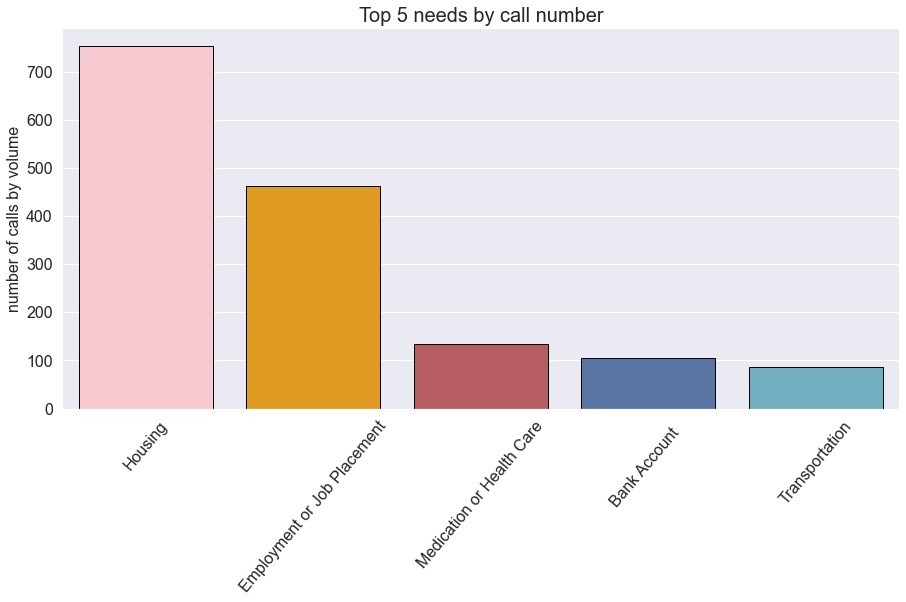

In [50]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1)
sns.barplot(x="Need", y="Num_of_calls", data=per_fin.head(5), palette=['pink','orange','r','b','c','m','g'], edgecolor='black')
plt.title('Top 5 needs by call number', fontsize=20)
plt.xticks(rotation=50, fontsize=16)
plt.xlabel('', fontsize=0)
plt.ylabel('number of calls by volume', fontsize=16)
plt.yticks(fontsize=16)
plt.gcf().set_size_inches(15,7)

#### Okay, I like where I'm at with that. We have a chart and it looks good. The next Crisis we should drill down into should be...
###### Abuse

In [51]:
Cri['CRISIS Issues - Abusive Behavior'].value_counts()

Adult Abused as a Child                                                                                                                              360
Abuse/Neglect of Spouse/Partner                                                                                                                      256
Rape/Sexual Abuse                                                                                                                                    214
Bullying                                                                                                                                             145
Other Abusive Behavior                                                                                                                               143
Abuse/Neglect of Parent/Other Family                                                                                                                 131
Harassment                                                                        

In [53]:
#We have to set the stage again or else things won't work later on.
Cri['CRISIS Issues - Abusive Behavior'] = Cri['CRISIS Issues - Abusive Behavior'].str.replace(';',' conjoined with')
Cri['CRISIS Issues - Abusive Behavior'] = Cri['CRISIS Issues - Abusive Behavior'].str.replace('/',' or ')
abuse=Cri['CRISIS Issues - Abusive Behavior'].value_counts()

In [54]:
abuse=pd.DataFrame(abuse)
abuse.reset_index(inplace=True)
abuse = abuse.rename(columns = {'index':"type_of_abuse", 'CRISIS Issues - Abusive Behavior':"count"})
print(abuse)

                                         type_of_abuse  count
0                              Adult Abused as a Child    360
1                Abuse or Neglect of Spouse or Partner    256
2                                 Rape or Sexual Abuse    214
3                                             Bullying    145
4                               Other Abusive Behavior    143
5           Abuse or Neglect of Parent or Other Family    131
6                                           Harassment    120
7    Adult Abused as a Child conjoined with Rape or...     65
8                Terrorism (Domestic or International)     50
9                            Cult or Ritualistic Abuse     50
10                     Other Physical Abuse or Neglect     44
11                  Harassment conjoined with Bullying     39
12                                  Child Sexual Abuse     37
13                              Child Abuse or Neglect     31
14   Abuse or Neglect of Parent or Other Family con...     29
15      

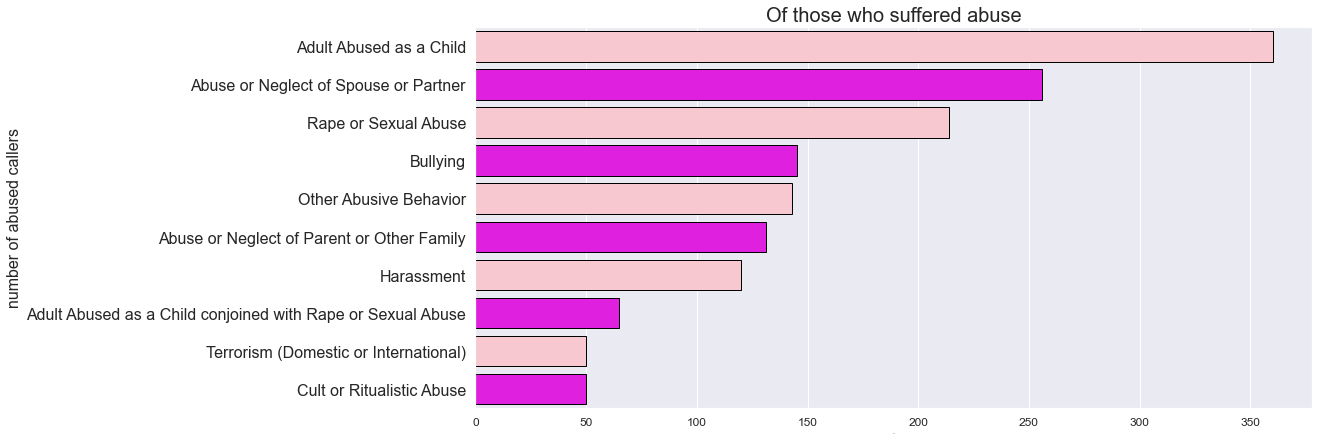

In [64]:
sns.set_theme(style="whitegrid")
sns.set(font_scale=1)
sns.barplot(y="type_of_abuse", x="count", data=abuse.head(10), palette=['pink','magenta'], edgecolor='black', orient='h')
plt.title('Of those who suffered abuse', fontsize=20)
plt.xticks(rotation=0, fontsize=12)
plt.xlabel('type', fontsize=0)
plt.ylabel('number of abused callers', fontsize=16)
plt.yticks(fontsize=16)
plt.gcf().set_size_inches(15,7)